In [3]:
import xarray as xr
data = xr.open_dataset("data/MARv3.14-ERA5-histo-1940.nc")
print(data['U10m'][0][0].to_numpy())

[9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36
 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36
 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36
 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36
 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36 3.6603684e+00
 3.7820041e+00 3.9076777e+00 3.5736427e+00 2.9689720e+00 3.2330277e+00
 3.6687531e+00 3.8609936e+00 3.7794666e+00 3.4927409e+00 3.2012548e+00
 3.1510456e+00 2.6559682e+00 3.4740374e+00 3.6381299e+00 3.4382021e+00
 3.3828065e+00 3.1357419e+00 3.7320781e+00 3.5174704e+00 3.3128998e+00
 3.3399744e+00 4.2536802e+00 4.1752982e+00 4.2352180e+00 4.6722136e+00
 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36
 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36
 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36 9.9692100e+36
 9.9692100e+36]


In [4]:
data

<xarray.Dataset>
Dimensions:  (time: 8784, y: 55, x: 66)
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01T00:30:00 ... 1940-12-31T23:30:00
  * x        (x) float32 -1.425e+05 -1.375e+05 ... 1.775e+05 1.825e+05
  * y        (y) float32 6.438e+06 6.433e+06 6.428e+06 ... 6.173e+06 6.168e+06
Data variables: (12/41)
    CC       (time, y, x) float32 ...
    DD       (time) float32 ...
    DIST     (y, x) float32 ...
    EP       (time, y, x) float32 ...
    ET       (time, y, x) float32 ...
    HH       (time) float32 ...
    ...       ...
    SWDD     (time, y, x) float32 ...
    T2m      (time, y, x) float32 ...
    U10m     (time, y, x) float32 ...
    U2m      (time, y, x) float32 ...
    YYYY     (time) float32 ...
    ZN       (time, y, x) float32 ...
Attributes:
    title:        Hourly MARv3.14 outputs in 1940 interpolated on the 5x5km^2...
    institution:  University of Liège (Belgium)
    netcdf:       4.4.1 of Mar 10 2021 09:03:02 $
    institute:    University of Liege (Belgium)
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    contact:      xavier.fettweis@uliege.be
    history:      Fri Oct  6 21:59:01 2023: ncks -4 --cnk_dmn y,55 --cnk_dmn ...
    model:        regional climate model MARv3.14.0

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from ipywidgets import interact

# Load the aggregated monthly dataset
ds = xr.open_dataset("data/monthly_aggregated/MARv3.14-ERA5-histo-1940-monthly-all-vars.nc")

# Function to plot a variable for a specific month
def plot_map(ds, var_name, month):
    """
    Plot the specified variable for the selected month on a map.
    """
    if var_name not in ds:
        print(f"Variable '{var_name}' not found in the dataset!")
        return

    # Select the data for the given month
    data = ds[var_name].sel(time=month)

    # Check if data is 3D (time, y, x) and select the first time slice
    if "time" in data.dims:
        data = data.isel(time=0)  # Take the first time slice

    # Now we have a 2D spatial variable (y, x)
    if "y" in data.dims and "x" in data.dims:
        fig, ax = plt.subplots(
            figsize=(10, 6),
            subplot_kw={"projection": ccrs.PlateCarree()},
        )
        
        # Plot data
        im = ax.pcolormesh(
            ds["LON"], ds["LAT"], data,
            transform=ccrs.PlateCarree(),
            cmap="viridis",
            shading="auto"
        )

        # Add map features
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle=":")
        ax.set_title(f"{var_name} for {month}", fontsize=16)
        plt.colorbar(im, ax=ax, orientation="vertical", label=var_name)
        plt.show()
    else:
        print(f"Variable '{var_name}' is not a spatial variable (y, x).")

# Interactive widget to select variable and month
@interact(
    variable=list(ds.data_vars.keys()), 
    month=ds["time"].dt.strftime("%Y-%m").values
)
def interactive_plot(variable, month):
    plot_map(ds, variable, month)



interactive(children=(Dropdown(description='variable', options=('CC', 'DD', 'DIST', 'EP', 'ET', 'HH', 'LAT', '…

In [4]:
ds

<xarray.Dataset>
Dimensions:  (x: 66, y: 55, time: 12)
Coordinates:
  * x        (x) float32 -1.425e+05 -1.375e+05 ... 1.775e+05 1.825e+05
  * y        (y) float32 6.438e+06 6.433e+06 6.428e+06 ... 6.173e+06 6.168e+06
  * time     (time) datetime64[ns] 1940-01-31 1940-02-29 ... 1940-12-31
Data variables: (12/41)
    CC       (time, y, x) float32 ...
    DD       (time) float32 ...
    DIST     (y, x) float32 ...
    EP       (time, y, x) float32 ...
    ET       (time, y, x) float32 ...
    HH       (time) float32 ...
    ...       ...
    SWDD     (time, y, x) float32 ...
    T2m      (time, y, x) float32 ...
    U10m     (time, y, x) float32 ...
    U2m      (time, y, x) float32 ...
    YYYY     (time) float32 ...
    ZN       (time, y, x) float32 ...

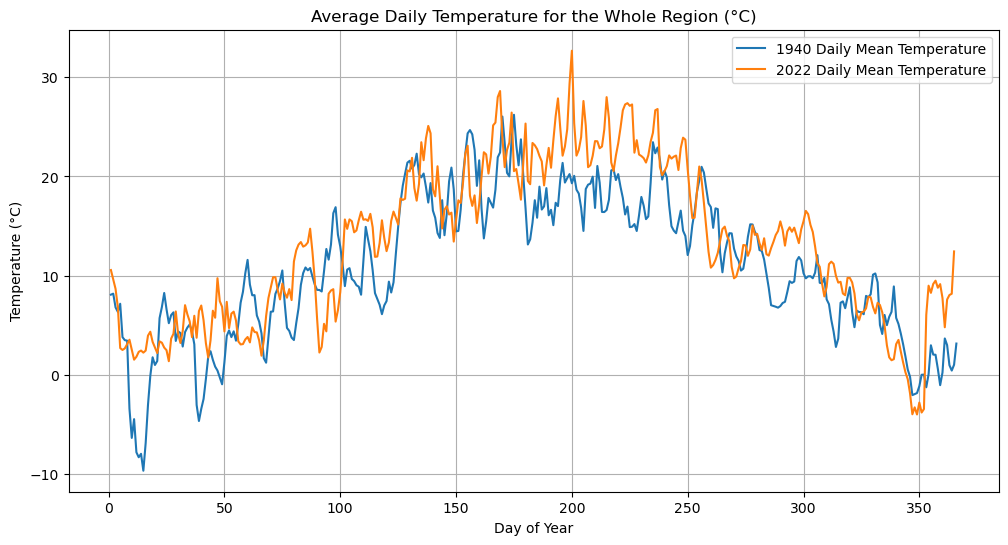

In [17]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

def convert_data(data, timestep="1d"):
    # Extract the T2m variable
    t2m = data['ST']

    # Replace the fill value (e.g., 9.9692100e+36) with NaN
    fill_value = t2m.attrs.get("_FillValue", 9.96921e36)  # Default if not explicitly set
    t2m = t2m.where(t2m != fill_value, np.nan)  # Replace fill values with NaN


    # Calculate daily averages
    daily_avg = t2m.resample(time=timestep).mean(dim="time", skipna=True)

    # Calculate regional daily averages
    region_daily_avg = daily_avg.mean(dim=["x", "y"], skipna=True)
    
    # Create a new "day of year" coordinate
    region_daily_avg = region_daily_avg.assign_coords(day_of_year=region_daily_avg['time'].dt.dayofyear)
    
    return region_daily_avg

# Load and process datasets
data1940 = convert_data(xr.open_dataset("data/MARv3.14-ERA5-histo-1960.nc"))
#data1980 = convert_data(xr.open_dataset("data/MARv3.14-ERA5-histo-1980.nc"))
#data2000 = convert_data(xr.open_dataset("data/MARv3.14-ERA5-histo-2000.nc"))
data2022 = convert_data(xr.open_dataset("data/MARv3.14-ERA5-histo-2022.nc"))



# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data1940['day_of_year'], data1940, label="1940 Daily Mean Temperature")
#plt.plot(data1980['day_of_year'], data1980, label="1980 Daily Mean Temperature")
#plt.plot(data2000['day_of_year'], data2000, label="2000 Daily Mean Temperature")
plt.plot(data2022['day_of_year'], data2022, label="2022 Daily Mean Temperature")
plt.title("Average Daily Temperature for the Whole Region (°C)")
plt.xlabel("Day of Year")
plt.ylabel("Temperature (°C)")
plt.grid()
plt.legend()
plt.show()


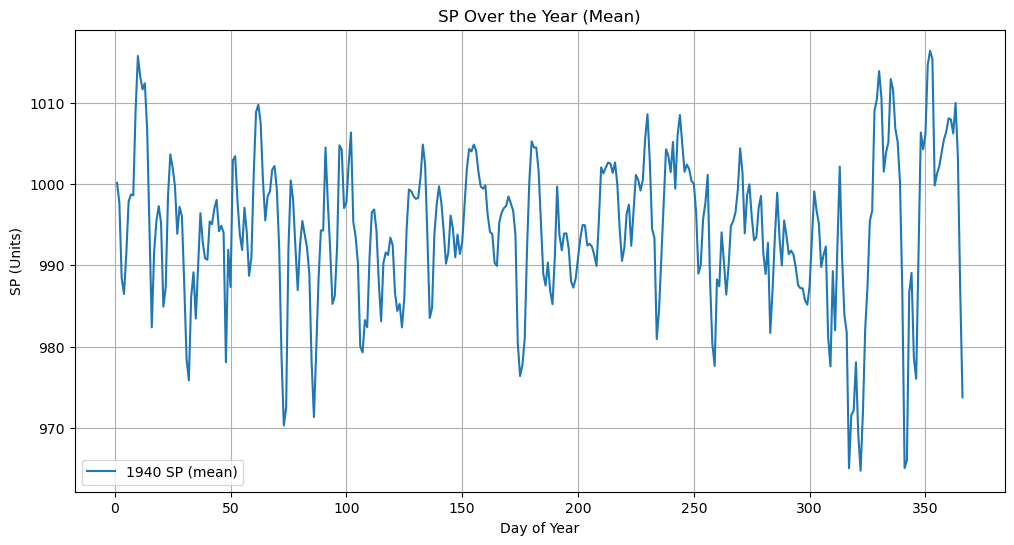

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

def convert_data(data, timestep="15d", variable="T2m", method="mean"):
    """
    Processes and resamples the given variable from an xarray dataset.

    Parameters:
        data (xarray.Dataset): The dataset containing the variable.
        timestep (str): Resampling frequency (e.g., '15d' for 15 days).
        variable (str): Variable to process.
        method (str): Resampling method ('mean' or 'sum').

    Returns:
        xarray.DataArray: Processed and resampled data.
    """
    var_data = data[variable]

    # Replace the fill value with NaN
    fill_value = var_data.attrs.get("_FillValue", 9.96921e36)
    var_data = var_data.where(var_data != fill_value, np.nan)

    # Resample data using the chosen method
    if method == "mean":
        resampled_data = var_data.resample(time=timestep).mean(dim="time", skipna=True)
    elif method == "sum":
        resampled_data = var_data.resample(time=timestep).sum(dim="time", skipna=True)
    else:
        raise ValueError("Invalid method. Use 'mean' or 'sum'.")

    # Compute regional averages
    region_avg = resampled_data.mean(dim=["x", "y"], skipna=True)

    # Assign day-of-year coordinate
    region_avg = region_avg.assign_coords(day_of_year=region_avg['time'].dt.dayofyear)

    return region_avg

def plot_variable_over_year(data_files, variable="T2m", timestep="15d", method="mean"):
    """
    Plots the specified variable over a year from multiple datasets.

    Parameters:
        data_files (dict): Dictionary with year as keys and file paths as values.
        variable (str): Variable to plot.
        timestep (str): Resampling frequency.
        method (str): Resampling method ('mean' or 'sum').
    """
    plt.figure(figsize=(12, 6))

    for year, file in data_files.items():
        data = convert_data(xr.open_dataset(file), timestep=timestep, variable=variable, method=method)
        plt.plot(data['day_of_year'], data, label=f"{year} {variable} ({method})")

    plt.title(f"{variable} Over the Year ({method.capitalize()})")
    plt.xlabel("Day of Year")
    plt.ylabel(f"{variable} (Units)")
    plt.grid()
    plt.legend()
    plt.show()

# Example usage
data_files = {
    "1940": "data/MARv3.14-ERA5-histo-1940.nc"
}
plot_variable_over_year(data_files, variable="SP", timestep="1d", method="mean")


In [11]:
# Load the aggregated monthly dataset
ds = xr.open_dataset("MARv3.14-ERA5-histo-1940-monthly-all-vars.nc")

In [18]:
def loop(
    sde: VPSDE,
    trainset: Dataset,
    validset: Dataset,
    epochs: int = 256,
    batch_size: int = 64,
    optimizer: str = 'AdamW',
    learning_rate: float = 1e-3,
    weight_decay: float = 1e-3,
    scheduler: float = 'linear',
    device: str = 'cpu',
    **absorb,
) -> Iterator:
    # Data
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1, persistent_workers=True)
    validloader = DataLoader(validset, batch_size=batch_size, shuffle=True, num_workers=1, persistent_workers=True)

    # Optimizer
    if optimizer == 'AdamW':
        optimizer = torch.optim.AdamW(
            sde.parameters(),
            lr=learning_rate,
            weight_decay=weight_decay,
        )
    else:
        raise ValueError()

    # Scheduler
    if scheduler == 'linear':
        lr = lambda t: 1 - (t / epochs)
    elif scheduler == 'cosine':
        lr = lambda t: (1 + math.cos(math.pi * t / epochs)) / 2
    elif scheduler == 'exponential':
        lr = lambda t: math.exp(-7 * (t / epochs) ** 2)
    else:
        raise ValueError()

    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lr)

    # Loop
    for epoch in (bar := trange(epochs, ncols=88)):
        losses_train = []
        losses_valid = []

        ## Train
        sde.train()

        for batch in trainloader:
            x, kwargs = to(batch, device=device)

            l = sde.loss(x, **kwargs)
            l.backward()

            optimizer.step()
            optimizer.zero_grad()

            losses_train.append(l.detach())

        ## Valid
        sde.eval()

        with torch.no_grad():
            for batch in validloader:
                x, kwargs = to(batch, device=device)
                losses_valid.append(sde.loss(x, **kwargs))

        ## Stats
        loss_train = torch.stack(losses_train).mean().item()
        loss_valid = torch.stack(losses_valid).mean().item()
        lr = optimizer.param_groups[0]['lr']

        yield loss_train, loss_valid, lr

        bar.set_postfix(lt=loss_train, lv=loss_valid, lr=lr)

        ## Step
        scheduler.step()

In [ ]:
CONFIG = {
    # Architecture
    'window': 5,
    'embedding': 64,
    'hidden_channels': (64, 128, 256),
    'hidden_blocks': (3, 3, 3),
    'kernel_size': 3,
    'activation': 'SiLU',
    # Training
    'epochs': 4096,
    'batch_size': 32,
    'optimizer': 'AdamW',
    'learning_rate': 2e-4,
    'weight_decay': 1e-3,
    'scheduler': 'linear',
}



In [4]:
from utils import TrajectoryDataset
from torch.utils.data import DataLoader
from pathlib import Path
# See Train Dimensions
PATH = Path('.')
trainset = TrajectoryDataset(PATH / 'data/train.h5', window=10)
validset = TrajectoryDataset(PATH / 'data/valid.h5', window=10)
batch_size = 5
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1, persistent_workers=True)
validloader = DataLoader(validset, batch_size=batch_size, shuffle=True, num_workers=1, persistent_workers=True)

for i, (batch, _) in  enumerate(trainloader):
    print(f"{i} : {batch.shape}")

0 : torch.Size([5, 10, 4, 55, 66])
1 : torch.Size([5, 10, 4, 55, 66])
2 : torch.Size([5, 10, 4, 55, 66])
3 : torch.Size([5, 10, 4, 55, 66])
4 : torch.Size([4, 10, 4, 55, 66])


In [18]:
from preprocess import load_xarray_nc_monthly

n_ds = load_xarray_nc_monthly()



month = '1940-01'
month_day = '1940-01-31'
var = 'U10m'
def plot_map_nan(var, month, month_day, n_ds):
    n_ds = n_ds.copy()
    n_ds['LON'] = n_ds['LON'].sel(time=month_day)
    n_ds['LAT'] = n_ds['LAT'].sel(time=month_day)
    n_ds[var] = n_ds[var].where(np.isnan(n_ds[var]), 1)  
    n_ds[var] = n_ds[var].where(~np.isnan(n_ds[var]), 0)
    plot_map(n_ds, var , month)


plot_map_nan('T2m', '1940-01', '1940-01-31', n_ds)

NameError: name 'plot_map' is not defined

end reading files
compute stat
Minimum T2m: -5.906100749969482
Maximum T2m: 38.870819091796875
Average T2m: 11.759604897764682
Standard Deviation of T2m: 6.828432541088906
25th Quantile of T2m: 6.431016802787781
50th Quantile (Median) of T2m: 11.128710746765137
75th Quantile of T2m: 16.481838703155518


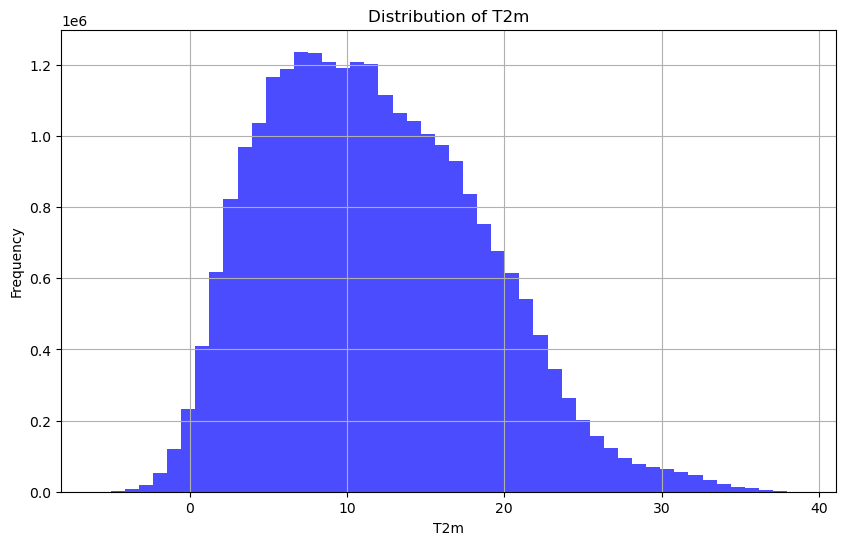

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from preprocess import inf_to_nan
import glob
import os

# Convert inf values (unobserved values) to nan
def inf_to_nan(ds, var):
    ds[var] = ds[var].where(~np.isinf(ds[var]), np.nan)
    return ds
def fillVal_to_nan(ds, var):
    # Replace the fill value (e.g., 9.9692100e+36) with NaN
    fill_value = ds[var].attrs.get("_FillValue", 9.96921e36)  # Default if not explicitly set
    ds[var] = ds[var].where(ds[var] != fill_value, np.nan)  # Replace fill values with NaN
    return ds

def analyze_variable(data_dir, file_pattern, variable, undefined_treatement):
    """
    Analyzes the specified variable from NetCDF files in the given directory.

    Parameters:
        data_dir (str): Directory containing the NetCDF files.
        file_pattern (str): Pattern to match NetCDF files.
        variable (str): Variable to analyze.
    """
    # Get a list of all the NetCDF files matching the pattern
    files = glob.glob(os.path.join(data_dir, file_pattern))
    # Initialize an empty list to store variable data
    variable_data = []

    # Loop through each file and extract data
    for file in files:
        ds = xr.open_dataset(file)
        ds = undefined_treatement(ds, variable)  # Convert inf to NaN
        data = ds[variable].values  # Extract variable
        variable_data.append(data)
        ds.close()
    print('end reading files')
    # Concatenate all data into a single numpy array
    variable_data = np.concatenate(variable_data, dtype=np.float64)

    # Flatten the array and remove NaN values
    variable_data_cleaned = variable_data[~np.isnan(variable_data)]
    print('compute stat')
    # Compute statistics
    var_min = np.min(variable_data_cleaned)
    var_max = np.max(variable_data_cleaned)
    var_mean = np.mean(variable_data_cleaned)
    var_std = np.std(variable_data_cleaned)
    var_quantiles = np.quantile(variable_data_cleaned, [0.25, 0.5, 0.75])

    # Print statistics
    print(f"Minimum {variable}: {var_min}")
    print(f"Maximum {variable}: {var_max}")
    print(f"Average {variable}: {var_mean}")
    print(f"Standard Deviation of {variable}: {var_std}")
    print(f"25th Quantile of {variable}: {var_quantiles[0]}")
    print(f"50th Quantile (Median) of {variable}: {var_quantiles[1]}")
    print(f"75th Quantile of {variable}: {var_quantiles[2]}")

    # Plot the distribution of the variable
    plt.figure(figsize=(10, 6))
    plt.hist(variable_data_cleaned.flatten(), bins=50, color='blue', alpha=0.7)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
analyze_variable('data/', 'MARv3.14-ERA5-histo-2020.nc', 'T2m', fillVal_to_nan)
#analyze_variable('data/monthly_aggregated', 'MARv3.14-ERA5-histo-*.nc', 'U10m', inf_to_nan)

end reading files
compute stat
Minimum RF: 2.242009031760972e-05
Maximum RF: 339.2593078613281
Average RF: 58.27077888268284
Standard Deviation of RF: 32.249814030230354
25th Quantile of RF: 34.48887920379639
50th Quantile (Median) of RF: 53.423933029174805
75th Quantile of RF: 76.68515014648438


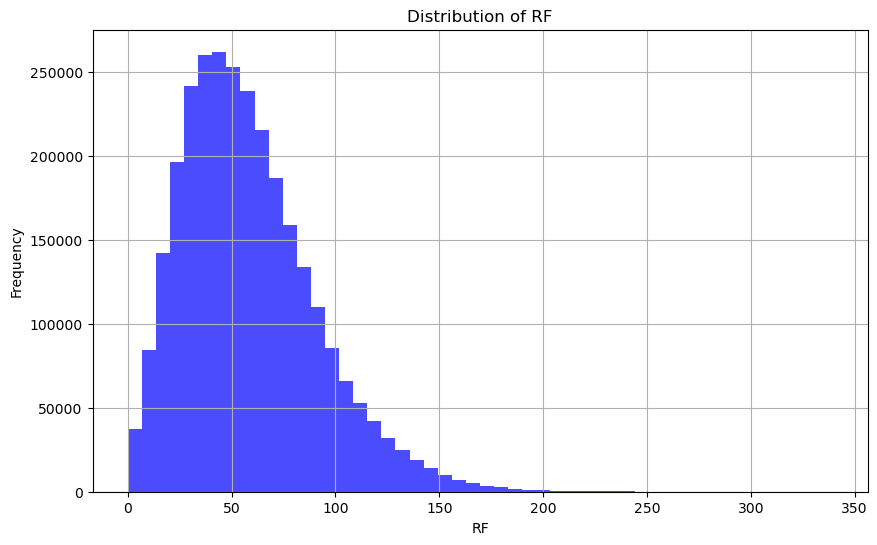

In [17]:
analyze_variable('data/monthly_aggregated', 'MARv3.14-ERA5-histo-*.nc', 'RF', inf_to_nan)

In [11]:
from preprocess import load_xarray_nc_monthly
data = xr.open_dataset("data/monthly_aggregated/MARv3.14-ERA5-histo-1940-monthly-all-vars.nc")
data

<xarray.Dataset>
Dimensions:  (x: 66, y: 55, time: 12)
Coordinates:
  * x        (x) float32 -1.425e+05 -1.375e+05 ... 1.775e+05 1.825e+05
  * y        (y) float32 6.438e+06 6.433e+06 6.428e+06 ... 6.173e+06 6.168e+06
  * time     (time) datetime64[ns] 1940-01-31 1940-02-29 ... 1940-12-31
Data variables: (12/41)
    CC       (time, y, x) float32 ...
    DD       (time) float32 ...
    DIST     (y, x) float32 ...
    EP       (time, y, x) float32 ...
    ET       (time, y, x) float32 ...
    HH       (time) float32 ...
    ...       ...
    SWDD     (time, y, x) float32 ...
    T2m      (time, y, x) float32 ...
    U10m     (time, y, x) float32 ...
    U2m      (time, y, x) float32 ...
    YYYY     (time) float32 ...
    ZN       (time, y, x) float32 ...

In [12]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from datetime import datetime

def inf_to_nan(ds, variables):
    """Convert inf values to NaN for specified variables."""
    for var in variables:
        ds[var] = ds[var].where(~np.isinf(ds[var]), np.nan)
    return ds

def fillVal_to_nan(ds, var):
    """Replace the fill value with NaN for the specified variable."""
    fill_value = ds[var].attrs.get("_FillValue", 9.96921e36)  # Default if not explicitly set
    ds[var] = ds[var].where(ds[var] != fill_value, np.nan)
    return ds

def plot_avg_hourly_variable(data_dir, file_pattern, variable):
    """
    Plots the average hourly values of a specified variable from NetCDF files.

    Parameters:
        data_dir (str): Directory containing the NetCDF files.
        file_pattern (str): Pattern to match NetCDF files.
        variable (str): Variable name in the dataset.
    """
    files = glob.glob(os.path.join(data_dir, file_pattern))
    hourly_values = []

    for file in files:
        ds = xr.open_dataset(file)
        ds = fillVal_to_nan(ds, variable)  # Replace fill values with NaN

        # Extract variable data
        data = np.array(ds[variable].values, dtype=np.float64)  # Shape: (time, lat, lon)

        # Reshape data to (days, hours, lat, lon)
        data = data.reshape(-1, 24, data.shape[1], data.shape[2])

        # Compute the daily average for each hour
        hourly_avg = np.nanmean(data, axis=(0, 2, 3))  # Average over days, lat, and lon
        hourly_values.append(hourly_avg)

        ds.close()

    # Average the hourly data across all years
    hourly_values = np.array(hourly_values)  # Shape: (years, hours)
    hourly_avg = np.nanmean(hourly_values, axis=0)  # Average over years

    # Plot the average hourly variable values
    hours = np.arange(24)  # Hours of the day
    plt.figure(figsize=(10, 6))
    plt.plot(hours, hourly_avg, marker='o', linestyle='-', color='blue')
    plt.title(f'Average Hourly {variable} Along the Day')
    plt.xlabel('Hour of the Day')
    plt.ylabel(f'{variable} (Units)')
    plt.grid(True)
    plt.xticks(hours)
    plt.show()



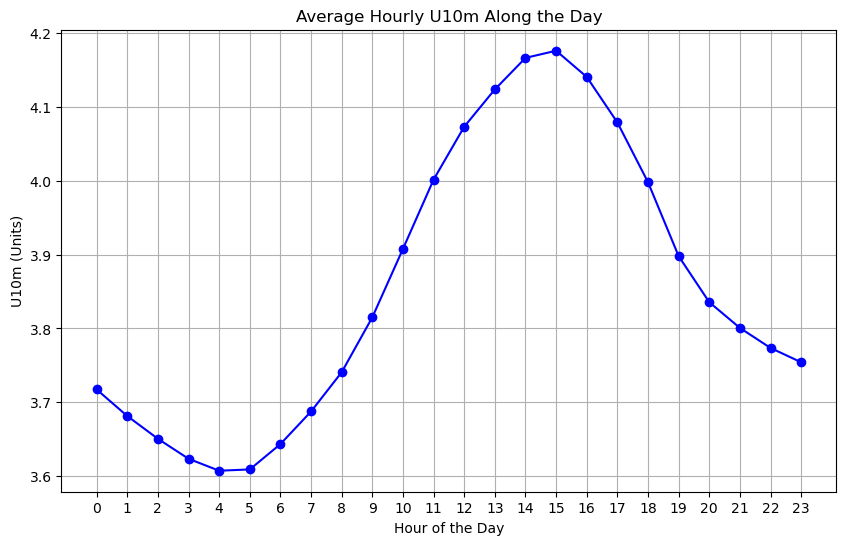

In [13]:

plot_avg_hourly_variable('data/', 'MARv3.14-ERA5-histo-2022.nc', 'U10m')

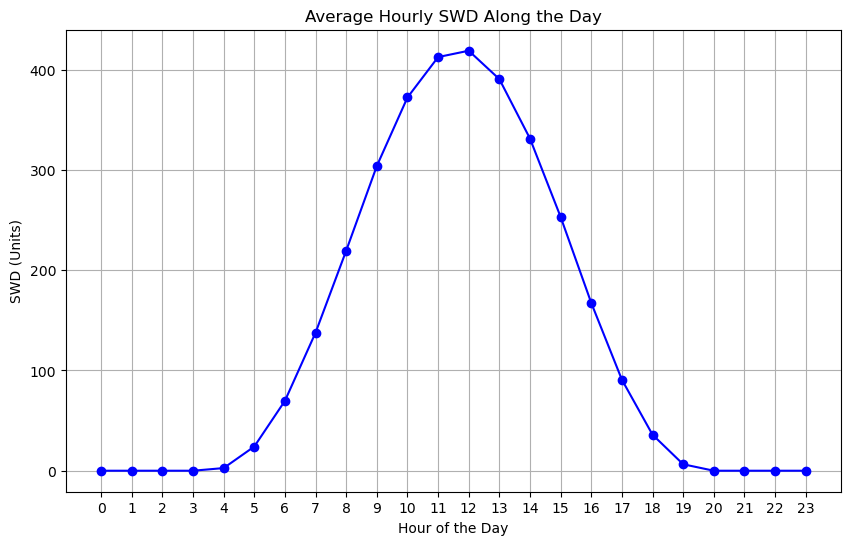

In [14]:
# Example usage
plot_avg_hourly_variable('data/', 'MARv3.14-ERA5-histo-2022.nc', 'SWD')

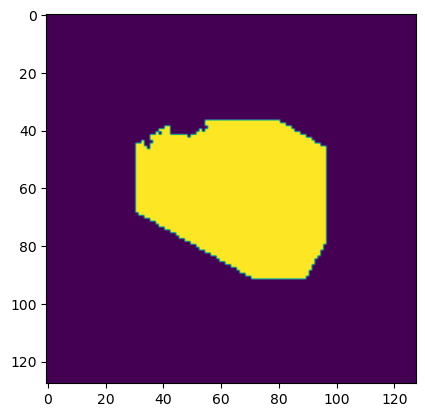

In [25]:
import matplotlib.pyplot as plt
import h5py
with h5py.File('data/mask.h5', 'r') as mask_file:
    mask = mask_file['dataset'][:]

plt.imshow(mask)
plt.show()

In [23]:
import torch.nn.functional as F
import torch
import numpy as np
import matplotlib.pyplot as plt
y_dim = 55
x_dim = 66
desired_shape = 128
pad_y_dim = (128-55)//2
pad_x_dim = (128-66)//2
source = torch.rand((55,66))
padded_source = F.pad(input=source, pad=(pad_x_dim,pad_x_dim,pad_y_dim+1,pad_y_dim), mode='constant', value=np.nan)

print(padded_source.shape)




torch.Size([128, 128])


In [28]:
import os
import h5py
import math
import torch
#import wandb
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import trange
from pathlib import Path
from utils import TrajectoryDataset
from score import ScoreUNet, MCScoreWrapper
from score import VPSDE, MCScoreNet

PATH = Path('.')

with h5py.File(PATH / "data/mask.h5", "r") as f:
    mask = torch.tensor(f["dataset"][:], dtype=torch.float32).unsqueeze(0)  # Shape

batch_size = 5
trainset = TrajectoryDataset(PATH / "data/train.h5", window=10)
validset = TrajectoryDataset(PATH / "data/valid.h5", window=10)

trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=1, persistent_workers=True)
validloader = DataLoader(validset, batch_size=batch_size, shuffle=False, num_workers=1, persistent_workers=True)
for i, (batch, _) in enumerate(trainloader):
    print(f"{i} Shape : {batch.shape}")


0 Shape : torch.Size([5, 10, 4, 128, 128])
1 Shape : torch.Size([5, 10, 4, 128, 128])
2 Shape : torch.Size([5, 10, 4, 128, 128])
3 Shape : torch.Size([5, 10, 4, 128, 128])
4 Shape : torch.Size([4, 10, 4, 128, 128])
